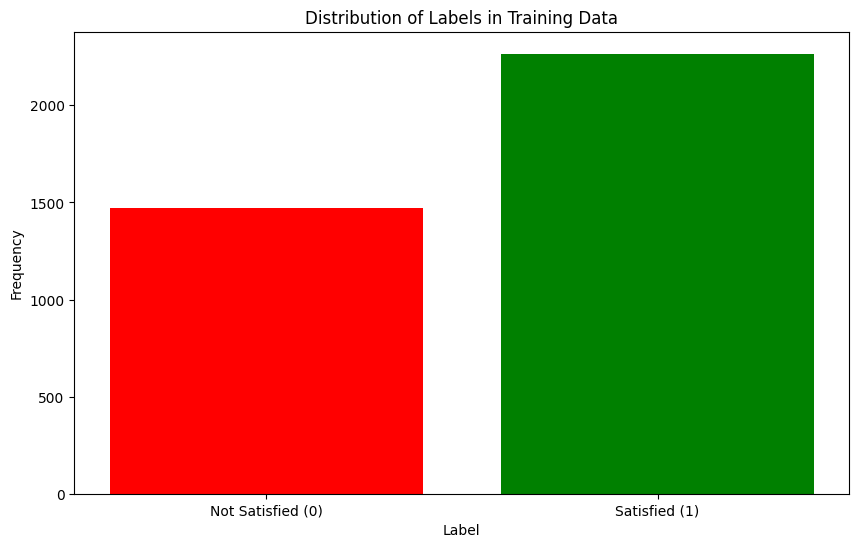

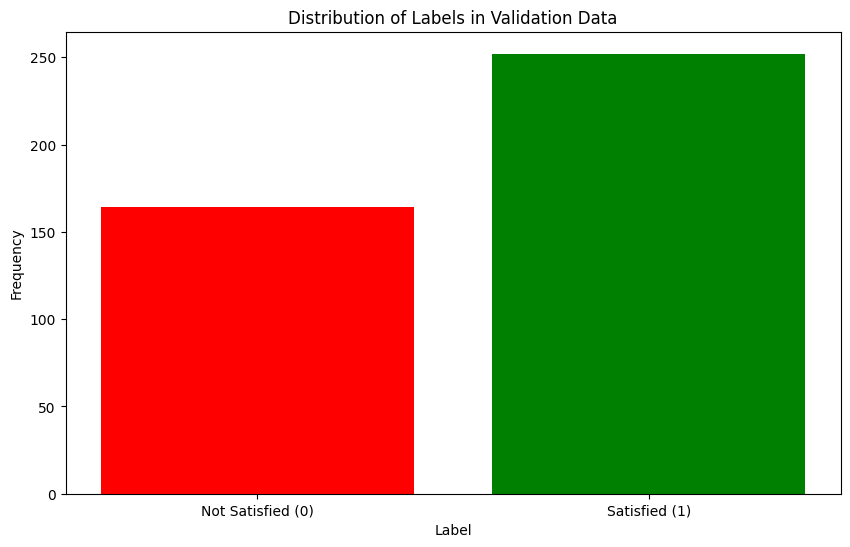

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu
train_df = pd.read_csv('train.csv')
val_df = pd.read_csv('val.csv')

# Tính số lượng các label 0 và 1
train_label_counts = train_df['label'].value_counts()
val_label_counts = val_df['label'].value_counts()

# Vẽ biểu đồ cho train.csv
plt.figure(figsize=(10, 6))
plt.bar(train_label_counts.index, train_label_counts.values, color=['green', 'red'])
plt.title('Distribution of Labels in Training Data')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Not Satisfied (0)', 'Satisfied (1)'])
plt.show()

# Vẽ biểu đồ cho val.csv
plt.figure(figsize=(10, 6))
plt.bar(val_label_counts.index, val_label_counts.values, color=['green', 'red'])
plt.title('Distribution of Labels in Validation Data')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Not Satisfied (0)', 'Satisfied (1)'])
plt.show()


In [30]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFBertForSequenceClassification
import matplotlib.pyplot as plt


In [31]:
# Đọc dữ liệu từ các file CSV
train_data = pd.read_csv("train.csv")  # Dữ liệu huấn luyện
val_data = pd.read_csv("val.csv")  # Dữ liệu kiểm thử

# Kiểm tra dữ liệu
print(train_data.head())
print(val_data.head())


                                                text  label
0                  sp tốt giao tầm tuần tại hàng qte      0
1    mn nên mua nha hình_ảnh mang tính_chất minh_hoạ      0
2        h h d d s s d d h s h d d s s h s h s s d d      0
3  đã nhận đx hàng dép đẹp giá rẻ nhưng về dép bị...      0
4                                   chất_liệu cao_su      0
                                                text  label
0                         đúng với mô_tả đúng vs ảnh      0
1                                             tạm ổn      0
2  túi giống với hình đăng , có đều kích_thước tú...      0
3  y y t x t cuc c t c x t d x t xtret t g g te e...      0
4                          độ bền màu om m chưa test      0


In [32]:
X_train = train_data['text'].values
y_train = train_data['label'].values

X_val = val_data['text'].values
y_val = val_data['label'].values


In [33]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
max_len = 128  # Giới hạn độ dài câu

# Tokenize và encode cho cả tập huấn luyện và kiểm thử
train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True, max_length=max_len)
val_encodings = tokenizer(X_val.tolist(), truncation=True, padding=True, max_length=max_len)


In [34]:
# Chuyển dữ liệu thành TensorFlow dataset
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
)).shuffle(len(X_train)).batch(16)

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    y_val
)).batch(16)


In [35]:
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)  # 2 nhãn


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [36]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])


ValueError: Could not interpret optimizer identifier: <keras.src.optimizers.adam.Adam object at 0x000001CB39F713C0>